<a href="https://colab.research.google.com/github/mthnakdag/XNPPfz6CFxZa3NeT/blob/main/XNPPfz6CFxZa3NeT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

---


ACME is a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, at ACME we are looking to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

<font color ="Red">
 Content:

1. [Libraries](#1)
1. [Load and Check Data](#2)
1. [Univeriate Variable Analysis](#3)
1. [Basic Data Analysis](#4)
1. [Outlier Detection](#5)
1. [Visualization](#6)
1. [Feature Engineering](#7)
1. [Modelling](#8)
1. [Test](#9)

<a id = "1"></a>
___
## Libraries


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import resample

<a id = "2"></a>
___
## Load and Check Data

In [2]:
# @title Read Data with driveLink  { display-mode: "form" }
url = 'https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7'  # @param {type:"string"}
url_list = url.split('/')
id = url_list[url_list.index('d')+1]
down_url = f'https://drive.google.com/uc?export=download&id={id}'
df = pd.read_csv(down_url)
original_df = df.copy()
df.head()

age           job  marital  education  ... month  duration campaign   y
0   58    management  married   tertiary  ...   may       261        1  no
1   44    technician   single  secondary  ...   may       151        1  no
2   33  entrepreneur  married  secondary  ...   may        76        1  no
3   47   blue-collar  married    unknown  ...   may        92        1  no
4   33       unknown   single    unknown  ...   may       198        1  no

[5 rows x 14 columns]

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [4]:
df.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

this table show as some outlier values  in the system and crit values:
* balance min -8019
* duration 4918
* campaign give 63 point

this is started point us

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


<a id="3"></a>
## Univeriate Variable Analysis

### Categorical

In [6]:
# @title Pie Plot function
def pie_plot(variable):
    """
        input: variable ex: "job"
        output: pie plot & value count
    """
    #get feature
    var = df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    fig = px.pie(values=varValue,names=varValue.index,template="plotly_white",title="Pie Plot in {} column".format(variable))
    fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
    fig.show()
    print("{}:\n{}".format(variable,varValue))

In [7]:
# @title Bar Plot function
def bar_plot(variable):
    """
        input: variable ex: "job"
        output: pie plot & value count
    """
    #get feature
    var = df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    fig = px.bar(y=varValue,x=varValue.index,template="plotly_white",title="Bar Plot in {} column".format(variable),color=varValue.index)
    fig.update_layout(showlegend=True)
    fig.show()
    print("{}:\n{}".format(variable,varValue))

In [8]:
# @title Analyse categorical variables

categoricals = ["job", "marital", "education", "default", "housing", "loan",
                'contact', 'month','y']
for c in categoricals:
    pie_plot(c) if random.getrandbits(1) else bar_plot(c)
    

job:
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64


marital:
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64


education:
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64


default:
no     39191
yes      809
Name: default, dtype: int64


housing:
yes    24031
no     15969
Name: housing, dtype: int64


loan:
no     33070
yes     6930
Name: loan, dtype: int64


contact:
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64


month:
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64


y:
no     37104
yes     2896
Name: y, dtype: int64


This analysis show us
* job: blue-collor, management, techniciaan, admin, services and others
* married: maybe change binarize( divorced add into single)
* educational: change numerical unknown+primary=0.25, secondary=.5, tertiary=.75
* default: it will be taken out
* mount and contact now unknown we can  analyze maybe later



### Numerical

In [9]:
# @title Histogram Plot function

def plot_hist(x_name):
    """
        input: x_name: must be numeric
        output: hist plot & value count 
    """
    fig = px.histogram(df,x= x_name,
                       title="Histogram of {} Column with distribution of y".format(x_name),
                       template="plotly_white",
                       marginal="violin",
                       histnorm='probability density',
                       color='y')
                      
    fig.update_layout(showlegend=True)
    fig.show()

In [10]:
numericals = ["age","balance","day","duration","campaign"]
for n in numericals:
  plot_hist(n)

* age show that our customer almostly 20 and 60 so that our targets age between 20-60 others external
* balance is unsteady, i think people say that unreal values so that i didn't include that column
*  day column looking uninformative we check with other column maybe can be perfect with other columns maybe we check that pca
* duration is most powerfull feature because it is very informative about y
* campaign need outlier detection

<a id="4"></a>
## Basic Data Analysis

In [11]:
df["y_num"] = np.where(df["y"].str.contains("yes"),1,0)

In [12]:
categoricals = ["job", "marital", "education", "default", "housing", "loan",
                'contact', 'month','y']
for c in categoricals:
  print("\t\t",c.upper())
  print(df[[c,"y_num"]].groupby([c], as_index= False).mean().sort_values(by="y_num",ascending= False))
  print("- * "*20)

		 JOB
              job     y_num
8         student  0.156489
5         retired  0.105080
10     unemployed  0.086957
4      management  0.082782
6   self-employed  0.079208
0           admin  0.078296
9      technician  0.072534
11        unknown  0.072340
2    entrepreneur  0.062633
7        services  0.060870
1     blue-collar  0.057018
3       housemaid  0.048758
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
		 MARITAL
    marital     y_num
2    single  0.094315
0  divorced  0.082751
1   married  0.060609
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
		 EDUCATION
   education     y_num
2   tertiary  0.091826
1  secondary  0.067546
3    unknown  0.062704
0    primary  0.056300
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
		 DEFAULT
  default     y_num
0      no  0.072644
1     yes  0.060569
- * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * 
		 HOUS

basically, there is no informative in the top side but we say that oct, mar months are should be **prioritized** and funny detail students are the want to take credit than others 

<a id="5"></a>
## Outlier Detection

In [13]:
# @title Detect Outlier Detection
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        #1st Quartile
        Q1 = np.percentile(df[c],25)
        #3rd Quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step = IQR*1.5
        #Detect Outlier and their Indeces
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col),
        
    outlier_indices = Counter(outlier_indices)
    #multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)
    return outlier_indices

In [14]:
df = df.drop(columns=["default","balance"],axis=0).reset_index(drop=True)

In [15]:
df2 = df.drop(detect_outliers(df,["duration","campaign"]),axis=0).reset_index(drop=True)
df2.describe()

age          day      duration      campaign         y_num
count  34184.000000  34184.00000  34184.000000  34184.000000  34184.000000
mean      40.548356     15.70770    202.984613      2.178739      0.041043
std        9.656415      8.22277    137.500315      1.339988      0.198392
min       19.000000      1.00000      0.000000      1.000000      0.000000
25%       33.000000      8.00000    100.000000      1.000000      0.000000
50%       39.000000     16.00000    167.000000      2.000000      0.000000
75%       48.000000     21.00000    274.000000      3.000000      0.000000
max       94.000000     31.00000    632.000000      6.000000      1.000000

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34184 entries, 0 to 34183
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        34184 non-null  int64 
 1   job        34184 non-null  object
 2   marital    34184 non-null  object
 3   education  34184 non-null  object
 4   housing    34184 non-null  object
 5   loan       34184 non-null  object
 6   contact    34184 non-null  object
 7   day        34184 non-null  int64 
 8   month      34184 non-null  object
 9   duration   34184 non-null  int64 
 10  campaign   34184 non-null  int64 
 11  y          34184 non-null  object
 12  y_num      34184 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.4+ MB


<a id="6"></a>
## Visualization

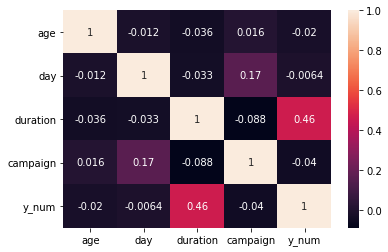

In [17]:
corr_list=['age','day','duration','campaign','y_num']
sns.heatmap(df[corr_list].corr(),annot=True)

In [18]:
cat_list = ['job','marital','education','housing','loan',
            'contact','month','y_num']
fig = px.parallel_categories(df[cat_list], color="y_num")
fig.show()

<a id="7"></a>
## Feature Engineering

In [19]:
# @title Age between 20 and 60
df2 = df2[(df2['age']>20) & (df2['age']<60)] 

In [20]:
# @title filter jobs
jobs = ["blue-collar", "management", "technician", "admin", "services"]
df2["job"] = df2.apply(lambda row: row.job if row.job in jobs else "other",axis=1)

In [21]:
# @title loan and housing convert Numeric
df2["housing"]=pd.Series(np.where(df2.housing.values == 'yes', 1, 0),  df2.index)
df2["loan"]=pd.Series(np.where(df2.loan.values == 'yes', 1, 0),  df2.index)

In [22]:
df2 = df2.reset_index(drop=True)

In [23]:
# @title target convert into binary
df2.y = df2.y_num
df2 = df2.drop(labels=['y_num'],axis=1)

In [24]:
# @title Age and Duration StandardScaler
df3 = pd.DataFrame(StandardScaler().fit_transform(df2[["age","duration"]]),columns=["age","duration"])
df2.age = df3.age
df2.duration = df3.duration

In [25]:
# @title Add Season Feature
seasons = {
    "winter": ['dec','jan','feb'],
    'spring': ['marc','apr', 'may'],
    'summer': ['jun', 'jul', 'aug'],
    'autumn': ['sep', 'oct', 'nov']
}
def get_season(row):
  for season,months in seasons.items():
    if row.month in months:
      return season

df2["season"] = df2.apply(get_season,axis=1)

In [26]:
# @title Add Day_of_Year Feature
months_cum = {
    'jan': 0,
    'feb': 31,
    'mar': 59,
    'apr': 90,
    'may': 120,
    'jun': 151,
    'jul': 181,
    'aug': 212,
    'sep': 243,
    'oct': 273,
    'nov': 304,
    'dec': 334,
}
df2['day_of_year'] = df2.apply(lambda row: months_cum[row.month]+row.day, axis=1)

In [27]:
# @title Add week_of_Year Feature

df2["week_of_year"]=df2.apply(lambda row: row.day_of_year//7+1, axis=1)

In [28]:
# @title day_of_year, day, campaign, week_of_year MinMaxScaler
df3 = pd.DataFrame(MinMaxScaler().fit_transform(df2[["day_of_year",'day','campaign',"week_of_year"]]),columns=["day_of_year",'day','campaign',"week_of_year"])
df2.day_of_year = df3.day_of_year
df2.week_of_year = df3.week_of_year
df2.campaign = df3.campaign
df2.day = df3.day

In [29]:
# @title Education convert Numerical
education_level={
    'unknown': 0.25,
    'tertiary': 1,
    'primary': 0.5,
    'secondary': 0.75,
}
df2.education = df2.apply(lambda row:education_level[row.education],axis=1)

In [30]:
# @title One Hot Encoding job feature
df3 = pd.get_dummies(df2.job, prefix='job')
df2 = pd.concat([df2,df3],axis=1)
df2.drop(labels=['job'],axis=1,inplace=True)

In [31]:
# @title One Hot Encoding marital feature
df3 = pd.get_dummies(df2.marital, prefix='marital')
df2 = pd.concat([df2,df3],axis=1)
df2.drop(labels=['marital'],axis=1,inplace=True)

In [32]:
# @title One Hot Encoding contact feature
df3 = pd.get_dummies(df2.contact, prefix='contact')
df2 = pd.concat([df2,df3],axis=1)
df2.drop(labels=['contact'],axis=1,inplace=True)

In [33]:
# @title One Hot Encoding month feature
df3 = pd.get_dummies(df2.month, prefix='month')
df2 = pd.concat([df2,df3],axis=1)
df2.drop(labels=['month'],axis=1,inplace=True)

In [34]:
# @title One Hot Encoding season feature
df3 = pd.get_dummies(df2.season, prefix='season')
df2 = pd.concat([df2,df3],axis=1)
df2.drop(labels=['season'],axis=1,inplace=True)

In [35]:
df2.education.value_counts()

0.75    17812
1.00     9318
0.50     5180
0.25     1224
Name: education, dtype: int64

on the below we compare original data and modified version

In [36]:
original_df

age           job   marital  education  ... month  duration campaign    y
0       58    management   married   tertiary  ...   may       261        1   no
1       44    technician    single  secondary  ...   may       151        1   no
2       33  entrepreneur   married  secondary  ...   may        76        1   no
3       47   blue-collar   married    unknown  ...   may        92        1   no
4       33       unknown    single    unknown  ...   may       198        1   no
...    ...           ...       ...        ...  ...   ...       ...      ...  ...
39995   53    technician   married   tertiary  ...   jun       107        1   no
39996   30    management    single   tertiary  ...   jun       238        3  yes
39997   54         admin  divorced  secondary  ...   jun       170        1  yes
39998   34    management   married   tertiary  ...   jun       342        1   no
39999   38    technician   married  secondary  ...   jun       113        1   no

[40000 rows x 14 columns]

In [37]:
df2

age  education  ...  season_summer  season_winter
0      1.936944       1.00  ...              0              0
1      0.417176       0.75  ...              0              0
2     -0.776928       0.75  ...              0              0
3      0.742840       0.25  ...              0              0
4     -0.776928       0.25  ...              0              0
...         ...        ...  ...            ...            ...
33529  1.394170       1.00  ...              1              0
33530 -1.102592       1.00  ...              1              0
33531  1.502725       0.75  ...              1              0
33532 -0.668373       1.00  ...              1              0
33533 -0.234153       0.75  ...              1              0

[33534 rows x 37 columns]

Feature engineering is completed normaly these steps control with pca or some other methodologies but they are common way so I think that they are enough for solve our problem normally create different dataset and control the accuracy or compare loss AUC etc.


NOW OUR PROBLEM IS BINARY CLASSIFICATION BUT MAIN PROBLEM IS TARGET IMBALANCED so that we create some sentatic data

In [38]:
# @title Upsample  Function
def upsample_classes(data, target):
  lst = list(data[target].unique())
  classes = []
  for c in lst:
    classes.append(data[data[target]==c])  
  length = 0
  class_lab = None
  for c in classes:
    if len(c)>length:
      length=len(c)
      class_lab = c
  class_lab = class_lab[target].unique()[0]
  regroup = pd.concat(classes)
  maj_class = regroup[regroup[target]==class_lab]
  lst.remove(class_lab) 
  new_classes=[]
  for i in lst:
    new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))
  minority_classes = pd.concat(new_classes)
  upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])
  return upsample

In [39]:
upsample_classes(df2,'y').y.value_counts()

1    32232
0    32232
Name: y, dtype: int64

a little bit magic :')

In [40]:
df2 = upsample_classes(df2,'y')
df2 = df2.reset_index(drop=True)
df2

age  education  ...  season_summer  season_winter
0      1.936944       1.00  ...              0              0
1      0.417176       0.75  ...              0              0
2     -0.776928       0.75  ...              0              0
3      0.742840       0.25  ...              0              0
4     -0.776928       0.25  ...              0              0
...         ...        ...  ...            ...            ...
64459 -1.319702       0.75  ...              0              0
64460 -0.125599       0.50  ...              0              0
64461  1.285615       1.00  ...              1              0
64462 -0.668373       0.75  ...              0              0
64463 -0.342708       0.75  ...              1              0

[64464 rows x 37 columns]

<a id="8"></a>
## Modelling

In [41]:

df2 = df2.sample(frac=1).reset_index(drop=True)

In [42]:
test_size = 14464
test = df2[:test_size]
y_acc = test["y"]
test.drop(labels=['y'],axis=1,inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
train = df2[test_size:]
X_train = train.drop(labels=["y"],axis=1)
y_train = train["y"]
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.1, random_state=42)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train = logreg.score(X_train,y_train)
acc_log_test = logreg.score(X_validation,y_validation)
print("*"*40)
print("Training Acc is % {} \n Testing Acc is % {}".format(round(acc_log_train*100,5),round(acc_log_test*100,5)))

****************************************
Training Acc is % 85.21111 
 Testing Acc is % 85.86


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



parameter tuning grid search and cross validation on the below we check that decision tree, svm, random forest, knn and logistic regression models

In [45]:
# @title GridSearch Prepare
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}


rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [46]:
# @title Grid Search Started
cv_result = []
best_estimators = []
for c,param in zip(classifier,classifier_param):
    clf = GridSearchCV(c, param_grid=param, cv = StratifiedKFold(n_splits = 5), scoring = "accuracy",n_jobs=-1,verbose = 1) # k give 5 in the question
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(clf.best_score_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1247 out of 1250 | elapsed:  2.7min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  2.7min finished


0.9755555555555555
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 29.9min finished


0.994688888888889
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   15.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8526666666666667
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 20.4min finished


0.9809555555555557


In [47]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})
fig = px.bar(cv_results,x="Cross Validation Means",y="ML Models", orientation='h',color=["DecisionTreeClassifier",
                                                                                          "RandomForestClassifier",
                                                                                          "LogisticRegression","KNeighborsClassifier"]
             )

fig.show()

An ensemble ml model on the below

In [48]:
votingC = VotingClassifier(estimators= [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1]),
                                        ("lr",best_estimators[2])], voting = "soft", n_jobs= -1)
votingC = votingC.fit(X_train,y_train)
print(accuracy_score(votingC.predict(X_validation),y_validation))

0.982


<a id="9"></a>
## TEST

we test with our test dataset because our machine learning model can not see this data so it is our target accuracy

decisiontree Accuracy 0.9781526548672567%


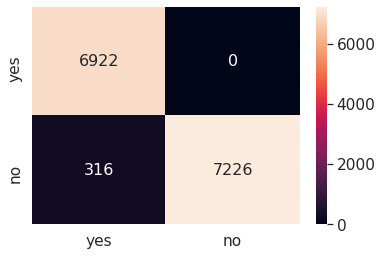

randomforest Accuracy 0.9945381637168141%


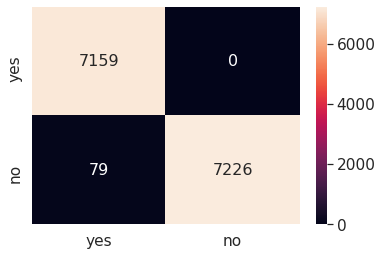

logisticregression Accuracy 0.8521155973451328%


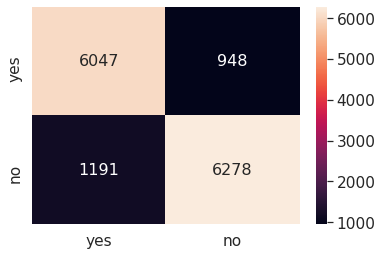

knn Accuracy 0.9827848451327433%


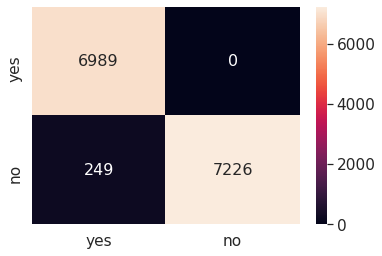

ensemble Accuracy 0.9807107300884956%


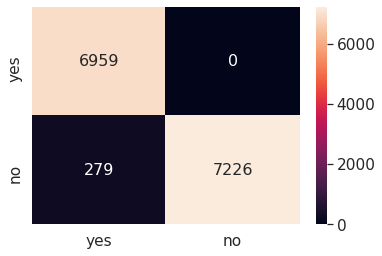

In [49]:
# @title Confusion Matrix
names = ["decisiontree",
         "randomforest",
         "logisticregression",
         "knn",
        ]
results = {}
for i,estimator in enumerate(best_estimators):
    results[names[i]] = estimator.predict(test)
results["ensemble"] = votingC.predict(test)
for key,values in results.items():
    cm = confusion_matrix(values, y_acc)
    df_cm = pd.DataFrame(cm, index = ["yes","no"],
                      columns = ["yes","no"])
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 16})
    print(f"{key} Accuracy {accuracy_score(values, y_acc)}%")
    plt.show()

End of the project we see that accuracy above ~%95 so that in practically build the model and test real life %95 this model overfitting because i didnt control overfitting but I usually check it with real world datasets but before i didnt work on a bank problem. Additionally, If you want to use deeplearning not machinelearning, you can implement with ANN solve this problem easily.
Bonuses
____________________

- This bank give more credit -> student,retired or umpleyod :') bank focused these jobs. we didn't know amount of credit because 5.000€ , 5.000.000.000€ are not the same i think add customer amount credit maybe we check that profit of bank more account.
- Another informative is -> (october,march)  many customers were convinced during these months. if this dataset is not only one year this information really informative otherwise we can  say lots of things for this month. Maybe Bank started a campaign these month, maybe inflation changed, maybe corona started in this country ... etc.
- Another think I delete some feature almostly they can be informative for machine learning like balance. Our dataset balance so dirty so i drop this feature. But my research on the net balance about the habit of getting credit

That's all thank you for giving me this chance